In [10]:
# Step 1: Import Libraries
# =============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [11]:
# Step 2: Load Dataset
# =============================
df = pd.read_csv("course_enrollments.csv")
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())


✅ Dataset loaded successfully!
Shape: (50, 2)
   UserID                                      Courses
0       1  Python Basics,Data Science,Machine Learning
1       2                          HTML,CSS,JavaScript
2       3                   Python Basics,Data Science
3       4                                     HTML,CSS
4       5  Data Science,Machine Learning,Deep Learning


In [12]:
# Step 3: Transaction Encoding
# =============================
transactions = df['Courses'].apply(lambda x: x.split(',')).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
print("\n✅ Encoded Transactions:")
print(df_encoded.head())


✅ Encoded Transactions:
      AI    CSS  Data Science  Deep Learning   HTML  JavaScript  \
0  False  False          True          False  False       False   
1  False   True         False          False   True        True   
2  False  False          True          False  False       False   
3  False   True         False          False   True       False   
4  False  False          True           True  False       False   

   Machine Learning  Python Basics  React  
0              True           True  False  
1             False          False  False  
2             False           True  False  
3             False          False  False  
4              True          False  False  


In [13]:
# Step 4: Apply Apriori Algorithm
# =============================
frequent_items = apriori(df_encoded, min_support=0.1, use_colnames=True)
frequent_items = frequent_items.sort_values(by="support", ascending=False)

print("\n✅ Frequent Itemsets Found:", len(frequent_items))
print(frequent_items.head(10))



✅ Frequent Itemsets Found: 20
    support                           itemsets
7      0.46                    (Python Basics)
2      0.40                     (Data Science)
6      0.38                 (Machine Learning)
4      0.36                             (HTML)
13     0.28      (Python Basics, Data Science)
10     0.24                        (HTML, CSS)
1      0.24                              (CSS)
12     0.22   (Machine Learning, Data Science)
17     0.20  (Machine Learning, Python Basics)
3      0.20                    (Deep Learning)


In [14]:
# Step 5: Generate Association Rules
# =============================
if not frequent_items.empty:
    rules = association_rules(frequent_items, metric="confidence", min_threshold=0.3)
    rules = rules.sort_values(by="lift", ascending=False)
    print("\n✅ Association Rules Generated:", len(rules))
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
else:
    print("⚠️ No frequent itemsets found. Try lowering min_support.")


✅ Association Rules Generated: 26
           antecedents        consequents  support  confidence      lift
3                (CSS)             (HTML)     0.24    1.000000  2.777778
2               (HTML)              (CSS)     0.24    0.666667  2.777778
8               (HTML)       (JavaScript)     0.20    0.555556  2.777778
9         (JavaScript)             (HTML)     0.20    1.000000  2.777778
11              (HTML)            (React)     0.18    0.500000  2.777778
10             (React)             (HTML)     0.18    1.000000  2.777778
19   (JavaScript, CSS)             (HTML)     0.12    1.000000  2.777778
20              (HTML)  (JavaScript, CSS)     0.12    0.333333  2.777778
18         (HTML, CSS)       (JavaScript)     0.12    0.500000  2.500000
17  (HTML, JavaScript)              (CSS)     0.12    0.600000  2.500000


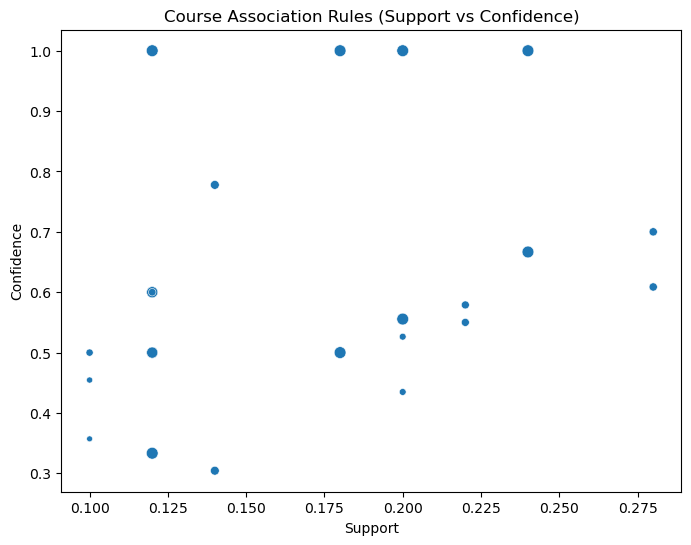

In [15]:
# Step 6: Visualization - Support vs Confidence
# =============================
if not frequent_items.empty and not rules.empty:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="support", y="confidence", size="lift", data=rules, legend=False)
    plt.title("Course Association Rules (Support vs Confidence)")
    plt.xlabel("Support")
    plt.ylabel("Confidence")
    plt.show()
else:
    print("⚠️ No rules to visualize.")

In [16]:
# Step 7: Display Top 5 Rules
# =============================
if not rules.empty:
    print("\n🧠 Top 5 Course Association Rules:")
    for i, row in rules.head(5).iterrows():
        print(f"{set(row['antecedents'])} → {set(row['consequents'])} "
              f"(support={row['support']:.2f}, confidence={row['confidence']:.2f}, lift={row['lift']:.2f})")
else:
    print("⚠️ No rules available to display.")


🧠 Top 5 Course Association Rules:
{'CSS'} → {'HTML'} (support=0.24, confidence=1.00, lift=2.78)
{'HTML'} → {'CSS'} (support=0.24, confidence=0.67, lift=2.78)
{'HTML'} → {'JavaScript'} (support=0.20, confidence=0.56, lift=2.78)
{'JavaScript'} → {'HTML'} (support=0.20, confidence=1.00, lift=2.78)
{'HTML'} → {'React'} (support=0.18, confidence=0.50, lift=2.78)
